In [1]:
import easyocr
import glob 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# helper functions

In [22]:
def plot_img_and_detection(img_path, extraction):
    label = img_path.split("/")[5]
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
    img = plt.imread(img_path)
    ax[0].imshow(img, extent=[0, 400, 0, 600])
    ax[0].set_title(f'{label}', fontsize=15)
    ax[0].set_axis_off()
    for coords, text, confidence in extraction:
        x_min, y_min = coords[0]
        x_max, y_max = coords[2]
        width = x_max - x_min
        height = y_max - y_min

        rect = Rectangle(
            (x_min, y_min),
            width,
            height,
            linewidth=1.0,
            edgecolor="blue",
            facecolor="none",
        )
        ax[1].add_patch(rect)
        
        ax[1].text(
            x_min, y_max + 1.5, f"{text} ({confidence:.2f})", fontsize=8, color="black"
        )

    ax[1].set_xlim(0, 400)
    ax[1].set_ylim(0, 600)
    ax[1].invert_yaxis()  # invert axis for ocr context (origin at top left)...
    ax[1].set_axis_off()
    plt.show()


def extract_text_from_img(img, decoder='beamsearch', canvas_size=100, mag_ratio=1, paragraph=False, detail=3):
    reader = easyocr.Reader(['en'])
    return reader.readtext(img, decoder=decoder, canvas_size= canvas_size, mag_ratio=mag_ratio, paragraph=paragraph, detail=detail)


# set datapath, def masks for data globbing...

In [5]:
mask = r'/Users/duuta/ocr-flaves/ghana_invoice_samples/*.[jp][pn][eg]*'
fps=glob.glob(mask)

In [18]:
extract_text_from_img(fps[0], paragraph=True)

/Users/duuta/anaconda3/envs/invoiceLLM/lib/python3.8/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(t

[[[[189, 13], [329, 13], [329, 29], [189, 29]], 'Send Payment Request'],
 [[[355, 13], [391, 13], [391, 27], [355, 27]], 'More'],
 [[[693, 99], [775, 99], [775, 153], [693, 153]],
  'DEMO BUSINESS 5958KNZ Demo City Ghana'],
 [[[60, 104], [170, 104], [170, 149], [60, 149]],
  'INVOICE Invoicel INV-000d03'],
 [[[63, 168], [137, 168], [137, 193], [63, 193]], 'Balance Dus- GHc 1,125.00'],
 [[[62, 222], [84, 222], [84, 230], [62, 230]], 'nvoi'],
 [[[61, 219], [127, 219], [127, 253], [61, 253]], 'Date ; Terms:'],
 [[[239, 219], [293, 219], [293, 233], [239, 233]], '14.01-2015'],
 [[[239, 241], [311, 241], [311, 253], [239, 253]], 'Due on Receipi'],
 [[[471, 247], [545, 247], [545, 279], [471, 279]], '8To Sandra Bojteng'],
 [[[63, 261], [107, 261], [107, 273], [63, 273]], 'Due Date'],
 [[[103, 297], [191, 297], [191, 309], [103, 309]], 'Item Desctiption'],
 [[[657, 297], [683, 297], [683, 309], [657, 309]], 'Rate'],
 [[[728, 298], [766, 298], [766, 306], [728, 306]], 'Aouni'],
 [[[106, 322], 

/Users/duuta/anaconda3/envs/invoiceLLM/lib/python3.8/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(t

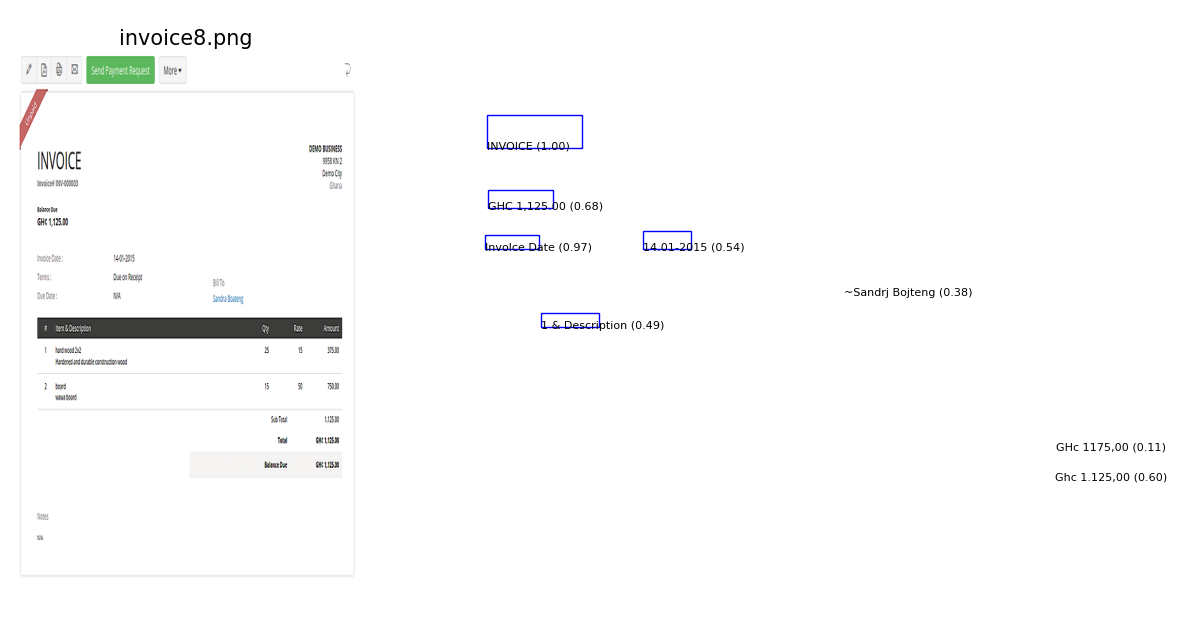

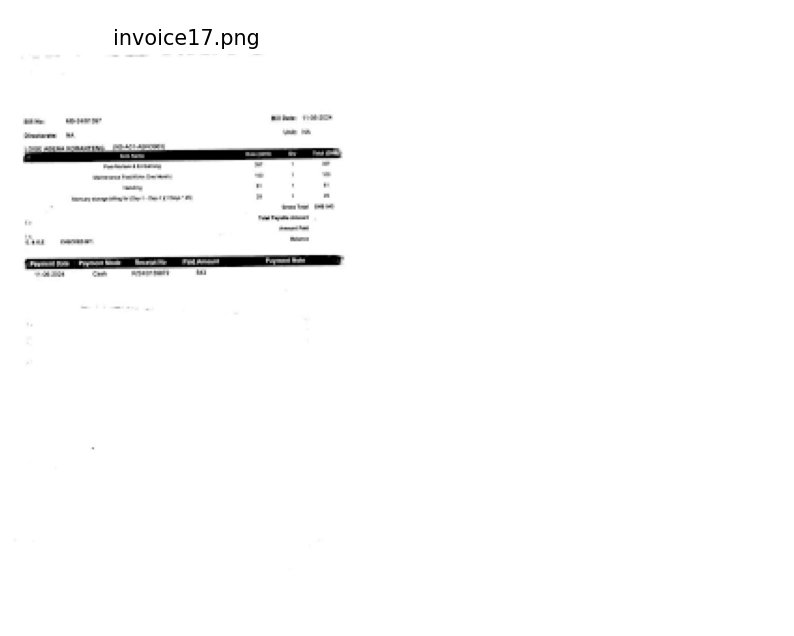

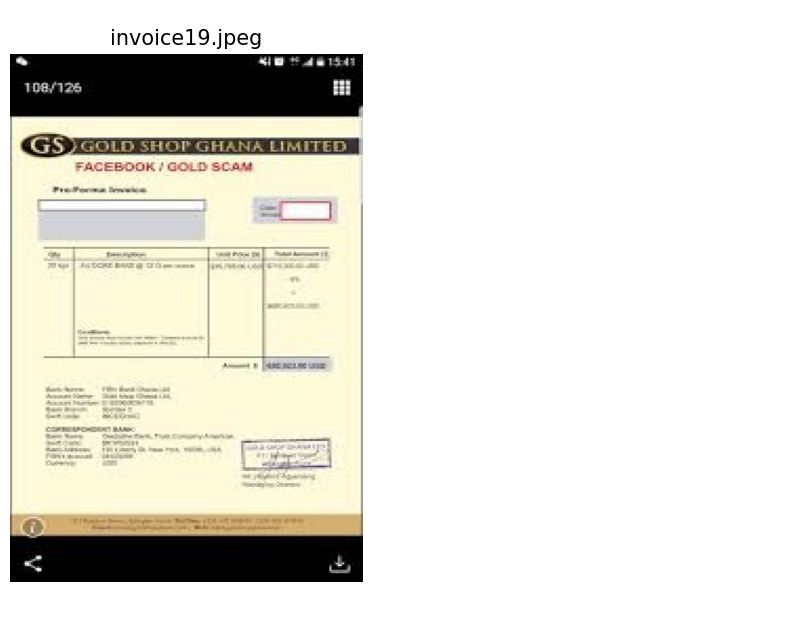

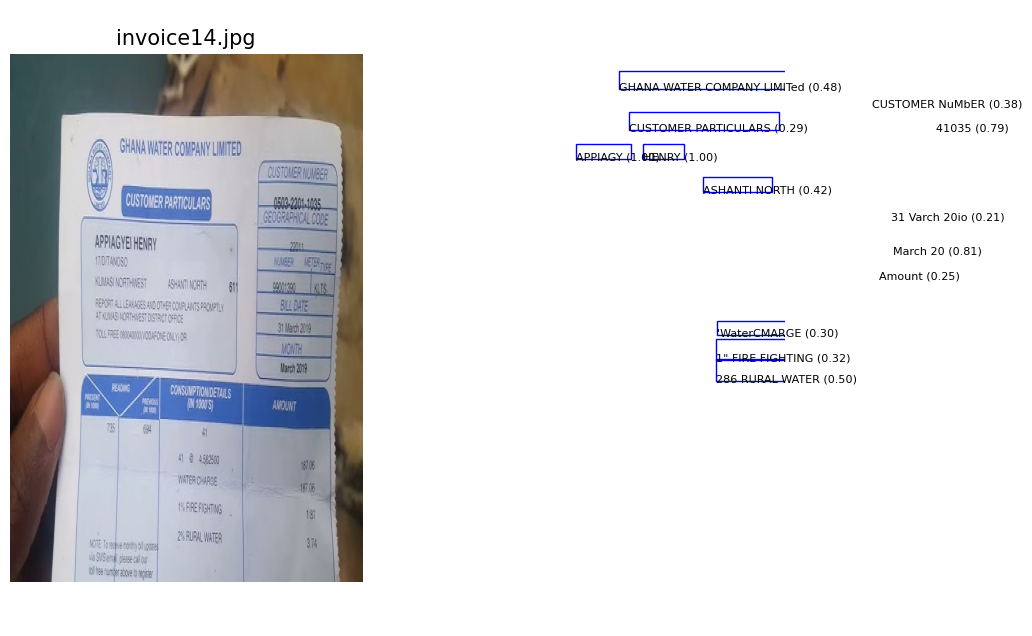

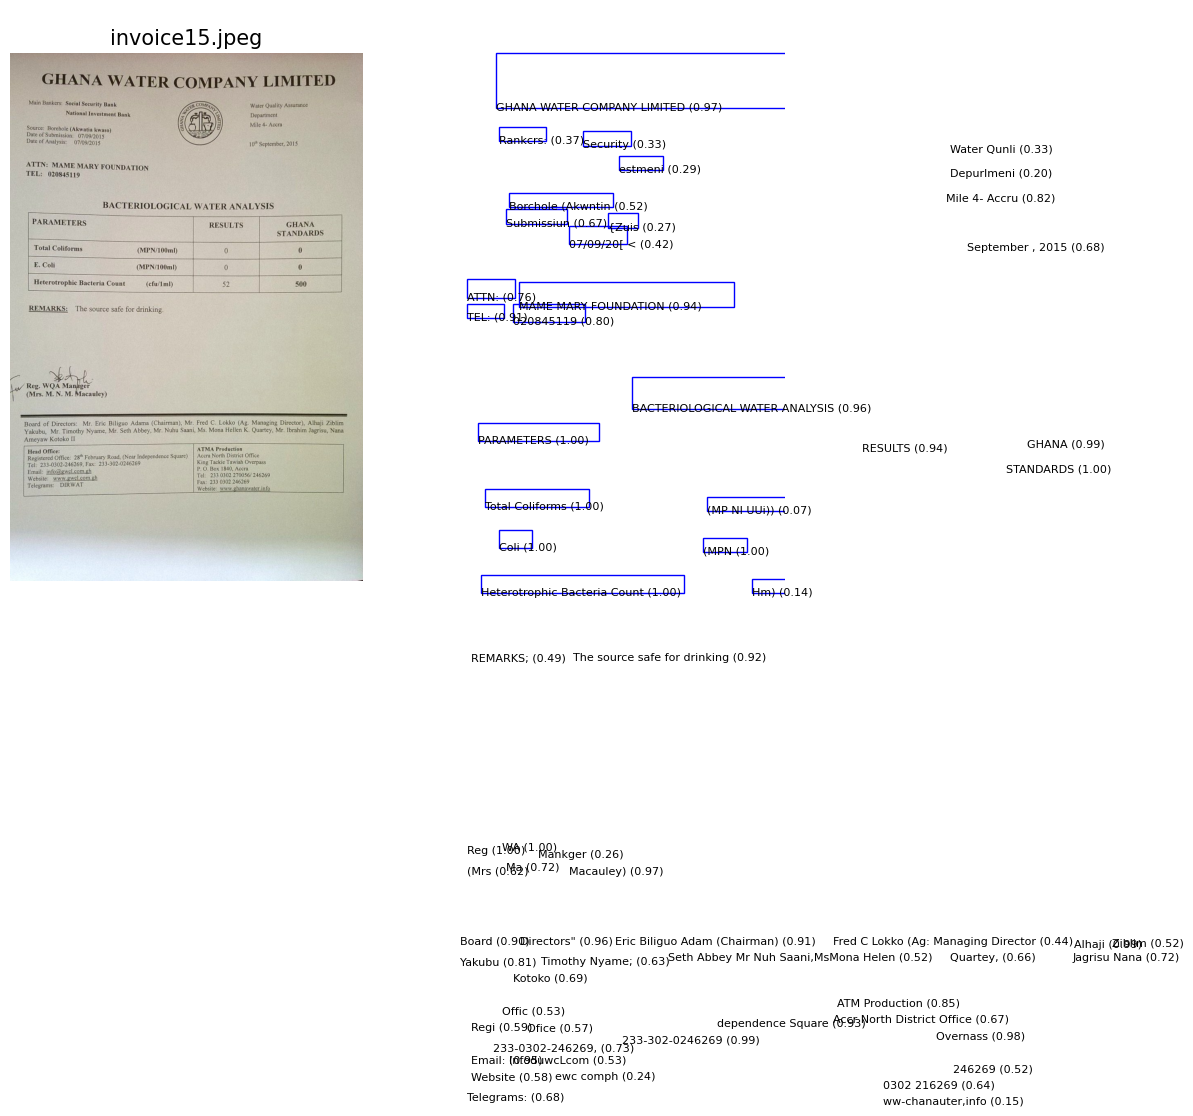

/Users/duuta/anaconda3/envs/invoiceLLM/lib/python3.8/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


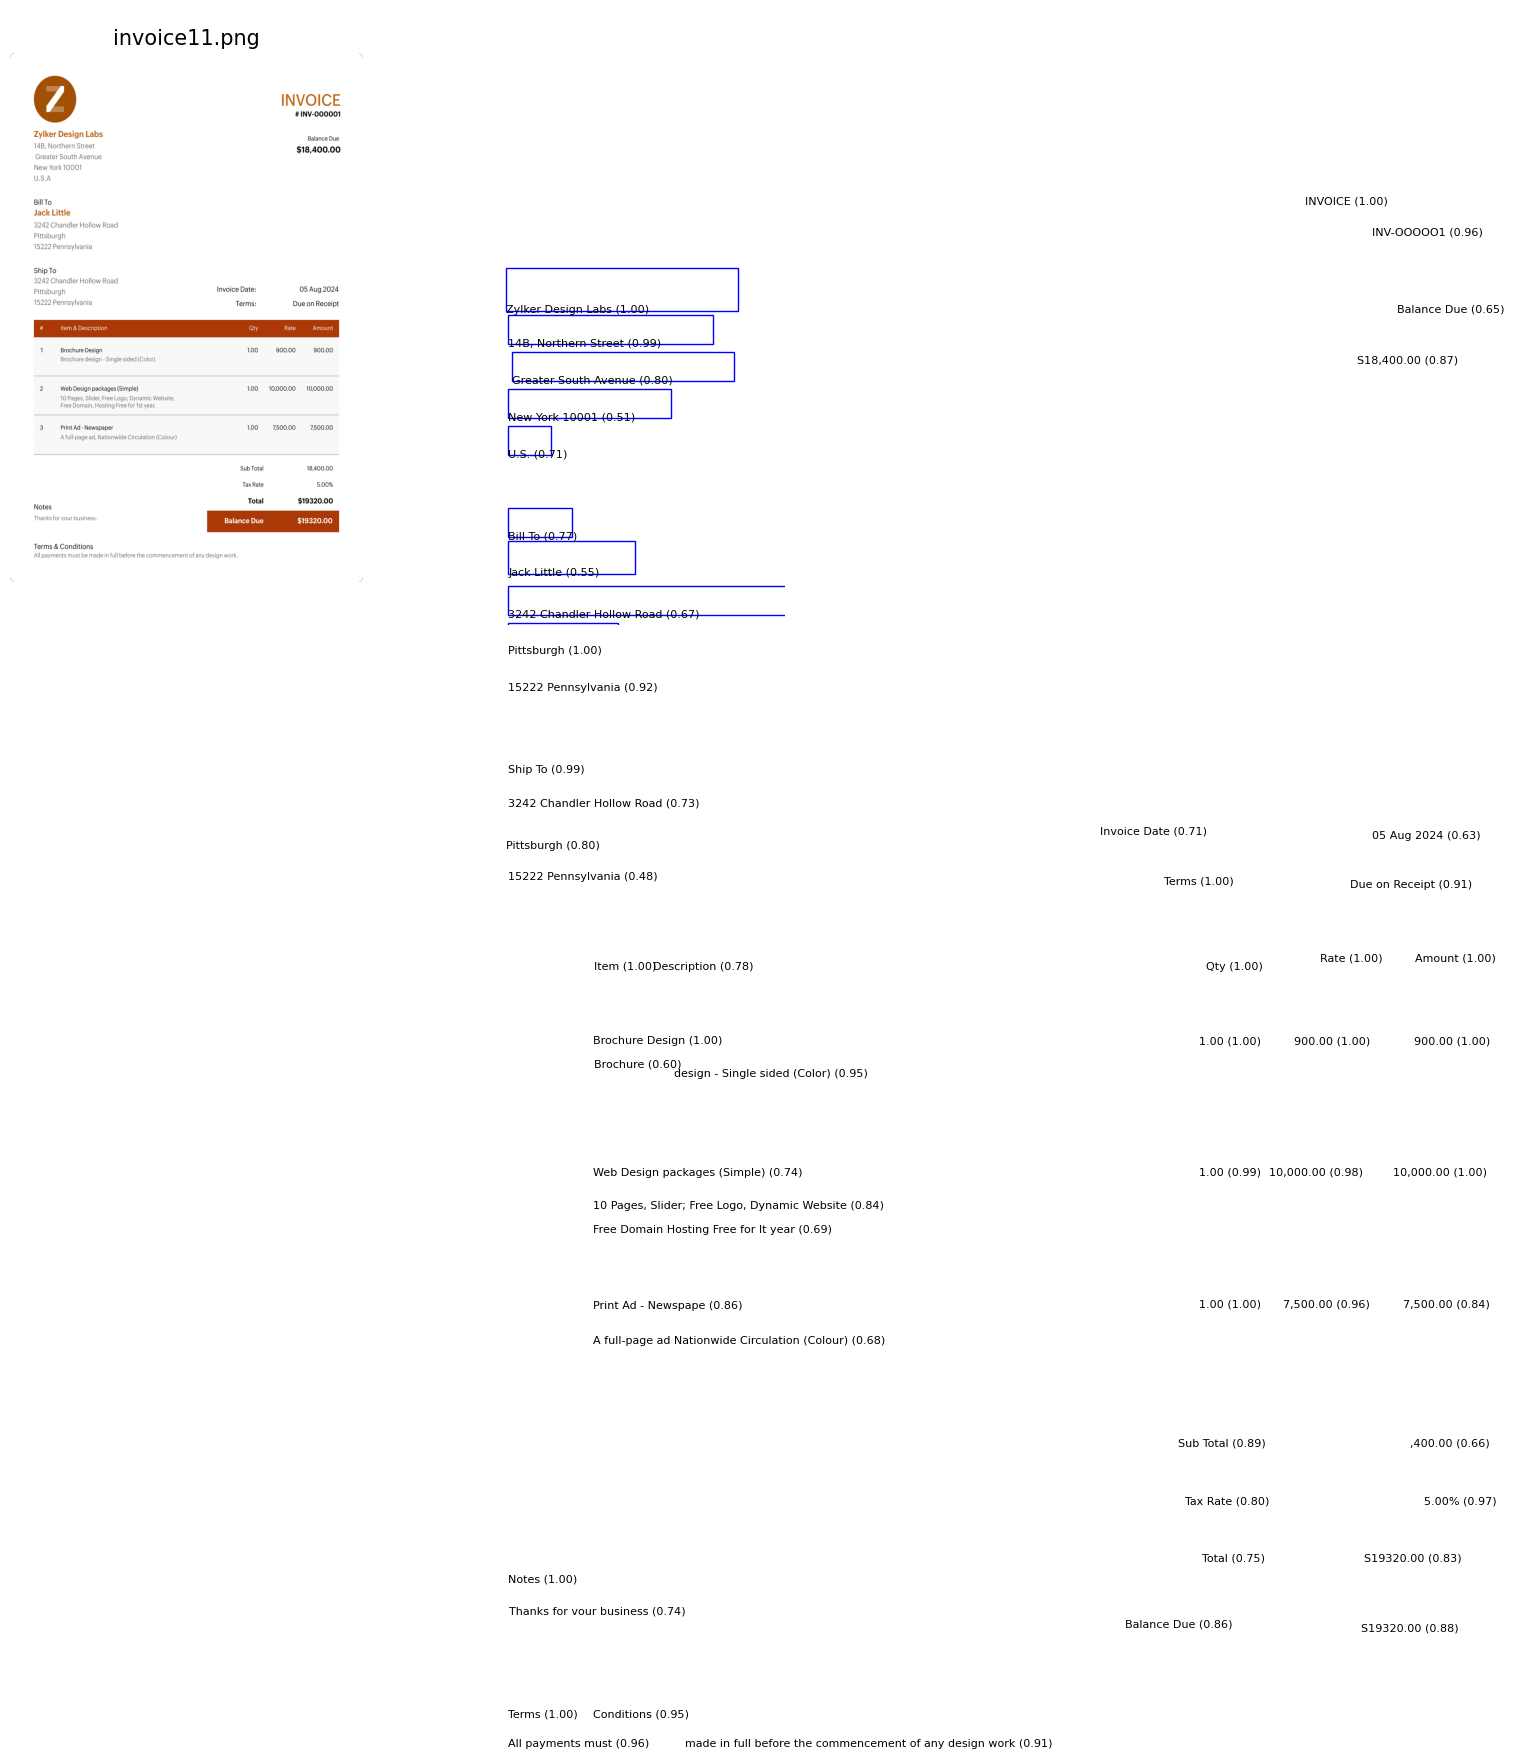

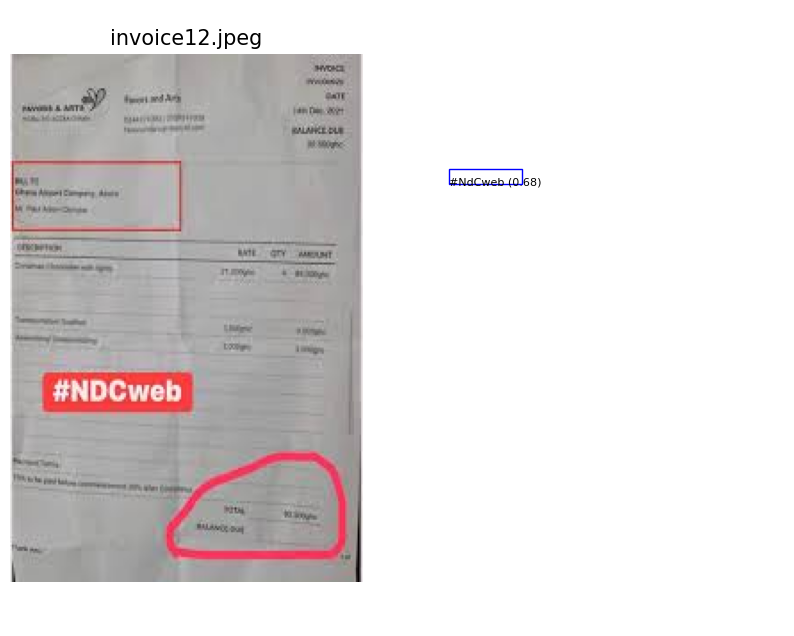

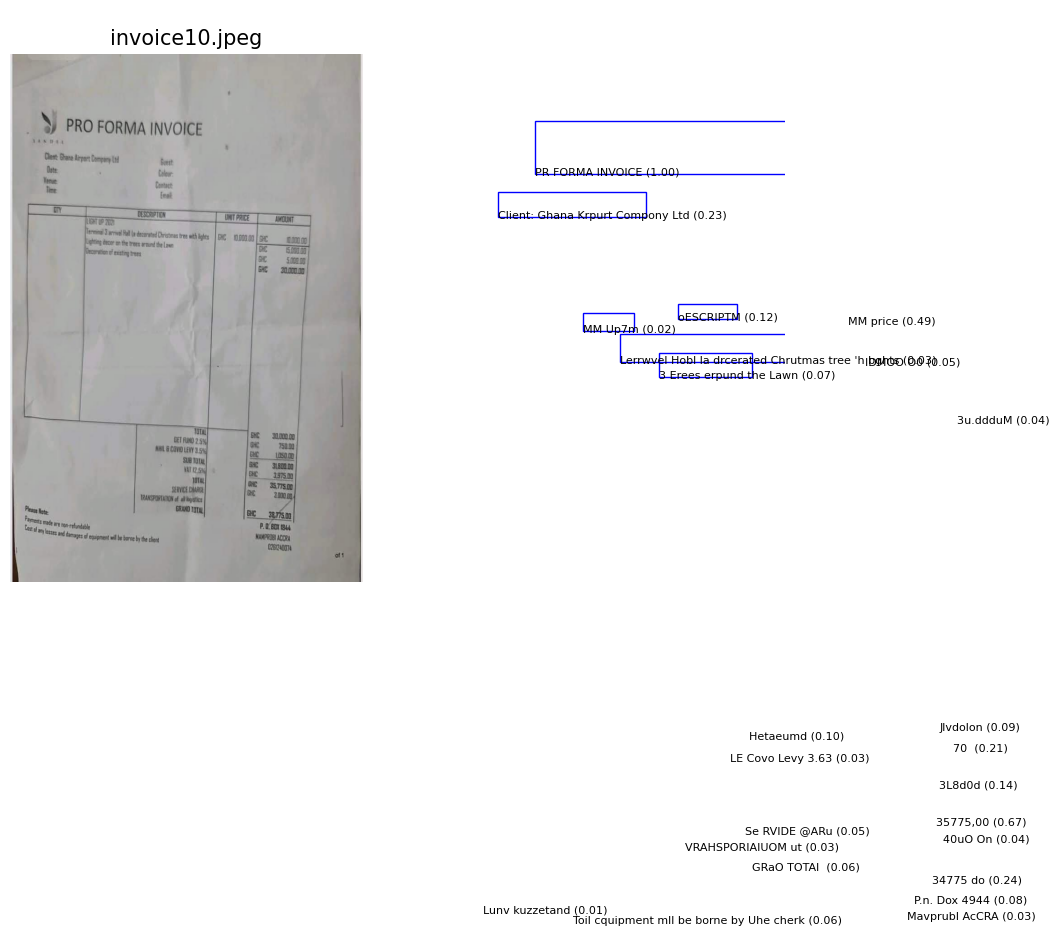

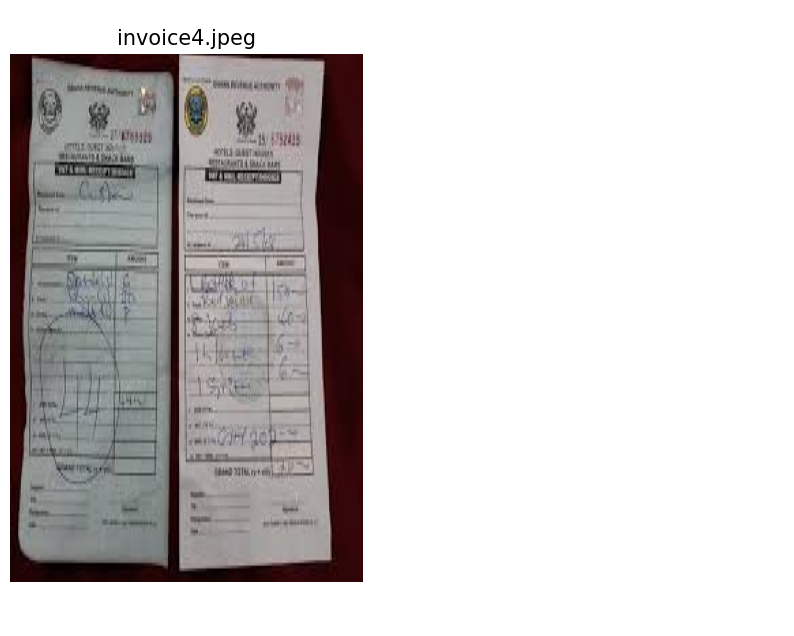

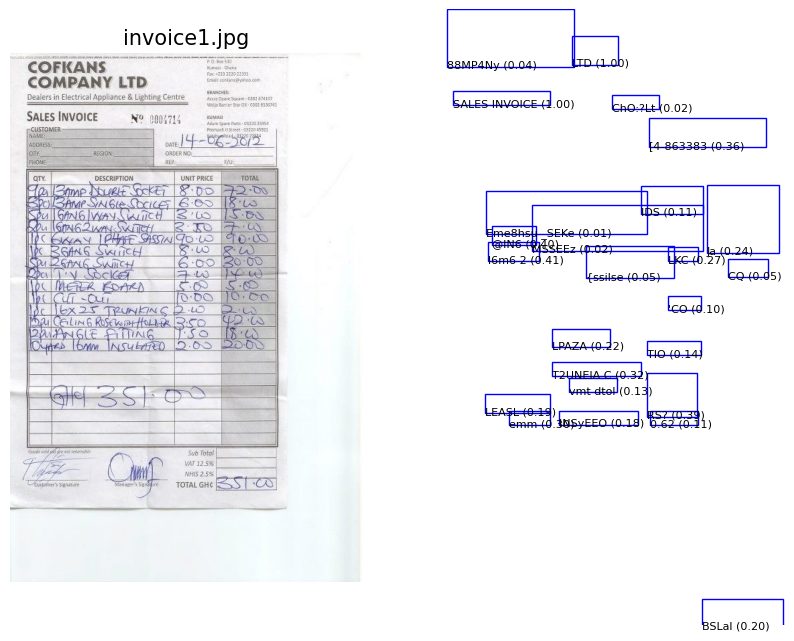

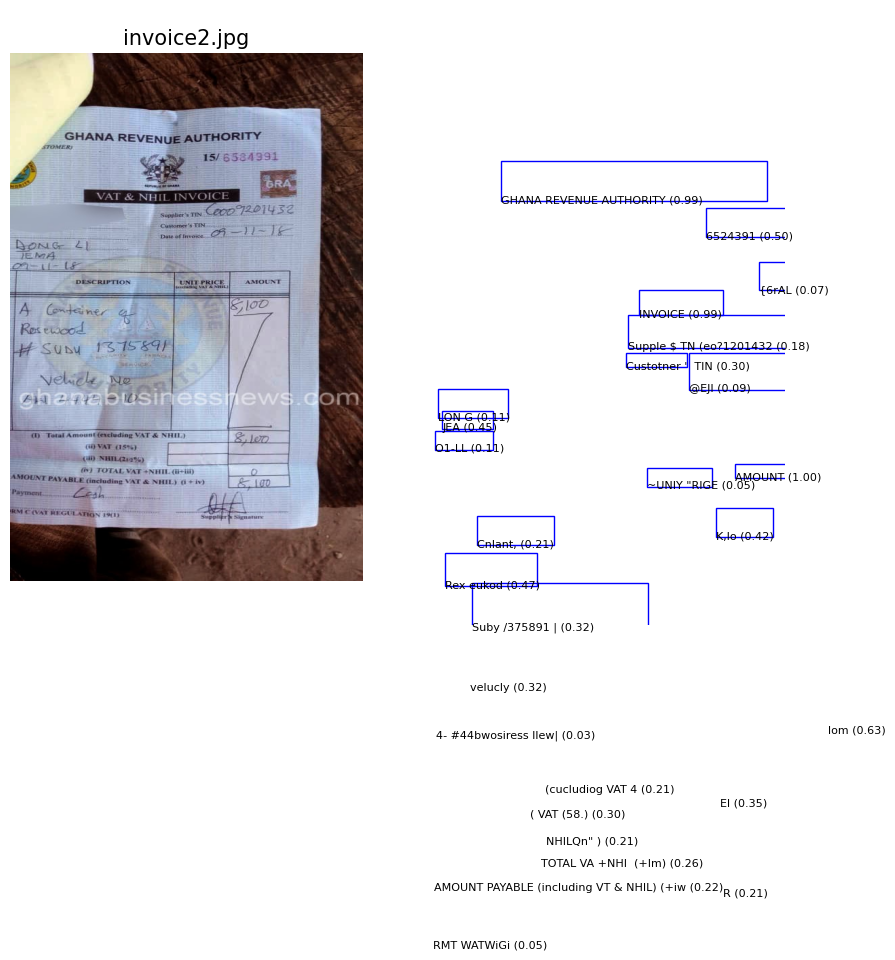

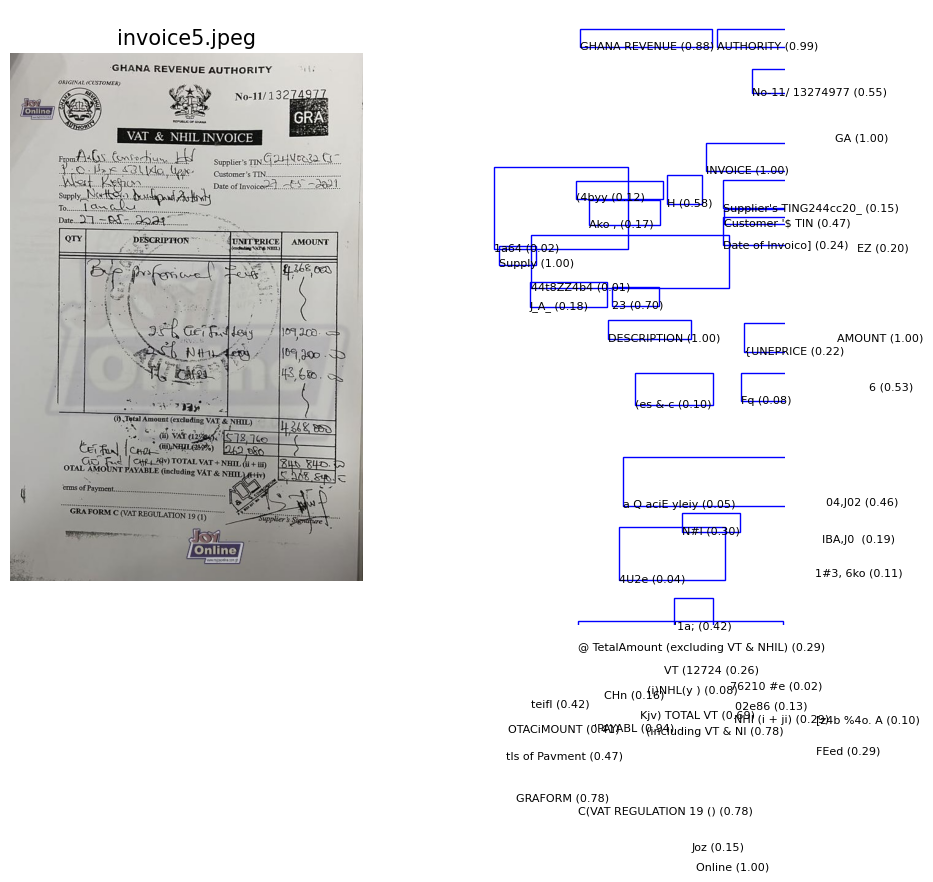

In [23]:
for img_path in fps:
    extraction = extract_text_from_img(img_path, 
                detail=3,
                decoder='wordbeamsearch', 
                paragraph=False,
                canvas_size=1000,
                mag_ratio=0.5,
    )
    plot_img_and_detection(img_path, extraction)